In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
housing = pd.read_csv('../data/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [3]:
b0 = 1
b1 = 2
housing['GuessResponse'] = b0 + b1 * housing['RM']

housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse
0,4.98,2.31,0.538,6.575,24.0,14.150
1,9.14,7.07,0.469,6.421,21.6,13.842
2,4.03,7.07,0.469,7.185,34.7,15.370
3,2.94,2.18,0.458,6.998,33.4,14.996
4,5.33,2.18,0.458,7.147,36.2,15.294


In [12]:
housing['observedError'] = housing['MEDV'] - housing['GuessResponse']
indices = [7, 20, 100]
print(housing['observedError'].loc[indices])

7      13.756
20      1.460
100    13.046
Name: observedError, dtype: float64


In [16]:
print(f"Sum of squared error is , {(housing['observedError']**2).sum()}")

Sum of squared error is , 75291.32258800001


In [30]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'MEDV~RM', data=housing).fit()

b0 = model.params[0]
b1 = model.params[1]
housing['BestResponse'] = b0 + b1*housing['RM']

housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse,observedError,observederror,BestResponse
0,4.98,2.31,0.538,6.575,24.0,14.150,9.850,9.850,25.175746
1,9.14,7.07,0.469,6.421,21.6,13.842,7.758,7.758,23.774021
2,4.03,7.07,0.469,7.185,34.7,15.370,19.330,19.330,30.728032
3,2.94,2.18,0.458,6.998,33.4,14.996,18.404,18.404,29.025938
4,5.33,2.18,0.458,7.147,36.2,15.294,20.906,20.906,30.382152


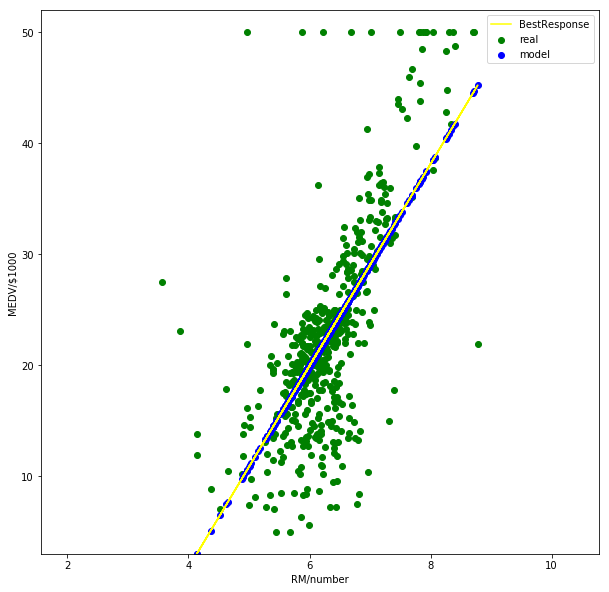

In [33]:
plt.figure(figsize=(10, 10))
plt.scatter(housing['RM'], housing['MEDV'], color='green', label='real')
plt.scatter(housing['RM'], housing['BestResponse'], color='blue', label='model')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow')
plt.ylabel('MEDV/$1000')
plt.xlabel('RM/number')
plt.xlim(np.min(housing['RM']) - 2, np.max(housing['RM']) + 2)
plt.ylim(np.min(housing['MEDV']) - 2, np.max(housing['MEDV']) + 2)
plt.legend()
plt.show()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           2.49e-74
Time:                        11:18:51   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""